In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x): return 1./(1 + np.exp(-x))

In [3]:
N = 30
t = np.linspace(-4, 6, N)
np.random.seed(2)
y = np.clip(sigmoid(t) + 0.1*np.random.randn(*t.shape), 0, 1)

In [4]:
t = np.around(t, 2)
y = np.around(y, 2)

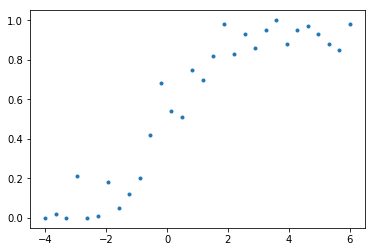

In [5]:
plt.plot(t, y, '.')
plt.show()

In [6]:
print([x for x in zip(t,y)])

[(-4.0, 0.0), (-3.66, 0.02), (-3.31, 0.0), (-2.97, 0.21), (-2.62, 0.0), (-2.28, 0.01), (-1.93, 0.18), (-1.59, 0.05), (-1.24, 0.12), (-0.9, 0.2), (-0.55, 0.42), (-0.21, 0.68), (0.14, 0.54), (0.48, 0.51), (0.83, 0.75), (1.17, 0.7), (1.52, 0.82), (1.86, 0.98), (2.21, 0.83), (2.55, 0.93), (2.9, 0.86), (3.24, 0.95), (3.59, 1.0), (3.93, 0.88), (4.28, 0.95), (4.62, 0.97), (4.97, 0.93), (5.31, 0.88), (5.66, 0.85), (6.0, 0.98)]


In [7]:
min_t = np.min(t)
max_t = np.max(t)
delta = 0.1*(max_t - min_t)
M = 10
intervals = np.linspace(min_t - delta, max_t + delta, M)

In [8]:
Z1 = np.float32(t[:,np.newaxis] > intervals[:-1])
Z2 = np.float32(t[:,np.newaxis] < intervals[1:])

D = (t[:,np.newaxis] - intervals[:-1])/np.diff(intervals)

A = D*Z1*Z2 + Z1*(1 - Z2)

In [10]:
import sys
sys.path.append('./')

from utils.simplex_projection import euclidean_proj_simplex

def function(x):
    v = A.dot(x) - y
    return 0.5*np.inner(v,v)

def gradient(x):
    return A.T.dot(A.dot(x) - y)


In [11]:
dim = M-1

x0 = np.random.rand(dim)

from scipy.optimize import check_grad

difference = check_grad(function, gradient, x0)
print(difference)

2.0263956943355873e-06


In [12]:
from scipy.linalg import norm
from scipy.optimize import line_search

def minimize_proj_gd(func, x0, grad, proj = lambda x: x, steepest=False):
    x = x0
    max_iter = 1000
    k=0
    x_old = x0*2
    while norm(x - x_old) > 1e-4 and k<max_iter:
        k = k+1
        p = -grad(x) # descent direction
        # exact search
        x_old = x
        if steepest:
            alpha = minimize_scalar(lambda a: func(x + a*p), bounds=(0, np.inf)).x # solve 1-d optimization
        # line-search to enforce strong Wolfe conditions
        else:
            alpha = line_search(func, grad, x, p)[0]
        x = x - alpha*grad(x)
        x = proj(x)

    return x

In [13]:
x_opt = minimize_proj_gd(function, x0, gradient, proj=euclidean_proj_simplex)

print(x_opt)

[0.03861932 0.00867307 0.1720567  0.40242242 0.24204952 0.06014621
 0.         0.         0.07603275]


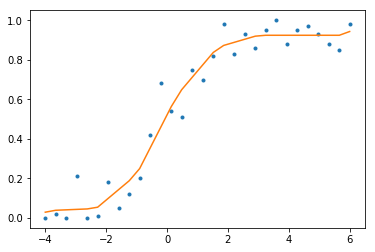

In [14]:
y_hat = A.dot(x_opt)

plt.plot(t, y, '.')
plt.plot(t, y_hat)
plt.show()

In [15]:
print(np.all(np.diff(y_hat) >= 0.))

True
